# COVID-19 Detection on Chest X-Ray Images: A comparison of CNN architectures and ensembles

#논문요약

흉부 X-ray 영상으로 코로나바이러스 질병 진단을 제안함

비임상적 접근과 인공 지능 기술의 사용에 중점을 두고 COVID-19를 가진 사람들을 탐지하고 식별하는 것을 목표

DenseNet169를 사용하여 이미지 특징을 추출하고 XGBoost 알고리즘을 분류에 사용

검출 정확도는 98.24% 3등급 문제에선 89.70%의 정확도에 도달

DNN 훈련이 필요하지 않아서 다른 제안된 방법보다 빠르고 계산 복잡도가 낮다는 장점을 가짐








Flow

*   데이터 처리 - 모델 생성 - 학습 - 검증 -  검증 평가


##라이브러리 준비

In [17]:
from glob import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.densenet import DenseNet169
from sklearn.model_selection import cross_validate, KFold
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc
# from google.colab import drive

##데이터 저장

In [13]:
images_path = {}
images_path["Covid"] = glob("./train/Covid-19/*.png")
images_path["Covid"] += glob("./train/Covid-19/*.jpeg")
images_path["Covid"] += glob("./train/Covid-19/*.jpg")
images_path['Covid']

['./train/Covid-19\\1-s2.0-S1684118220300682-main.pdf-002-a1.png',
 './train/Covid-19\\1-s2.0-S1684118220300682-main.pdf-002-a2.png',
 './train/Covid-19\\1-s2.0-S1684118220300682-main.pdf-003-b1.png',
 './train/Covid-19\\1-s2.0-S1684118220300682-main.pdf-003-b2.png',
 './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png',
 './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png',
 './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png',
 './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png',
 './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png',
 './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png',
 './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png',
 './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4b.png',
 './train/Covid-19\\23E99E2E-447C-46E5-8EB2-D35D12473C39.png',
 './t

In [15]:
images_path = {}

images_path["Covid"] = glob("./train/Covid-19/*.png")
images_path["Covid"] += glob("./train/Covid-19/*.jpeg")
images_path["Covid"] += glob("./train/Covid-19/*.jpg")

images_path["NoFindings"] = glob("./train/No_findings/*.png")
images_path["NoFindings"] += glob("./train/No_findings/*.jpeg")
images_path["NoFindings"] += glob("./train/No_findings/*.jpg")

images_path["Pneumonia"] = glob("./train/Pneumonia/*.png")
images_path["Pneumonia"] += glob("./train/Pneumonia/*.jpeg")
images_path["Pneumonia"] += glob("./train/Pneumonia/*.jpg")

print(images_path["Covid"])
print()
print(images_path["NoFindings"])
print()
print(images_path["Pneumonia"])

images_class = {
    "Covid": 0,
    "Pneumonia": 1,
    "NoFindings": 2 
}

['./train/Covid-19\\1-s2.0-S1684118220300682-main.pdf-002-a1.png', './train/Covid-19\\1-s2.0-S1684118220300682-main.pdf-002-a2.png', './train/Covid-19\\1-s2.0-S1684118220300682-main.pdf-003-b1.png', './train/Covid-19\\1-s2.0-S1684118220300682-main.pdf-003-b2.png', './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png', './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png', './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png', './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png', './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3a.png', './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png', './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4a.png', './train/Covid-19\\1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-003-fig4b.png', './train/Covid-19\\23E99E2E-447C-46E5-8EB2-D35D12473C39.png', './train/Covid-19

##데이터의 개수

In [16]:
print(len(images_path['Covid']))
print(len(images_path['NoFindings']))
print(len(images_path['Pneumonia']))

125
500
500


##데이터 출력

In [ ]:
""
X = []
Y = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X.append(image)
        Y.append(images_class[label])


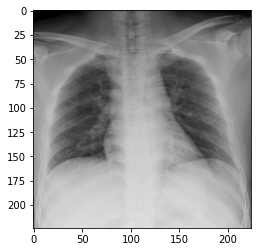

In [ ]:
plt.imshow(X[0])
plt.show()

(1125, 224, 224, 3)
(1125,)


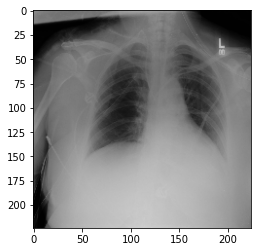

In [ ]:
print(np.array(X).shape)
print(np.array(Y).shape)

plt.imshow(X[1124])

##모델 생성


DenseNet이란 ResNet의 ShortCut 개념을 확장해 CNN 구조를 바꾸는 시도를 한 알고리즘



> ResNet이란 Microsoft에서 개발한 알고리즘( layer의 구조가 깊어질수록 정확도가 감소하는 문제를 해결하기 위해 제안됨 )









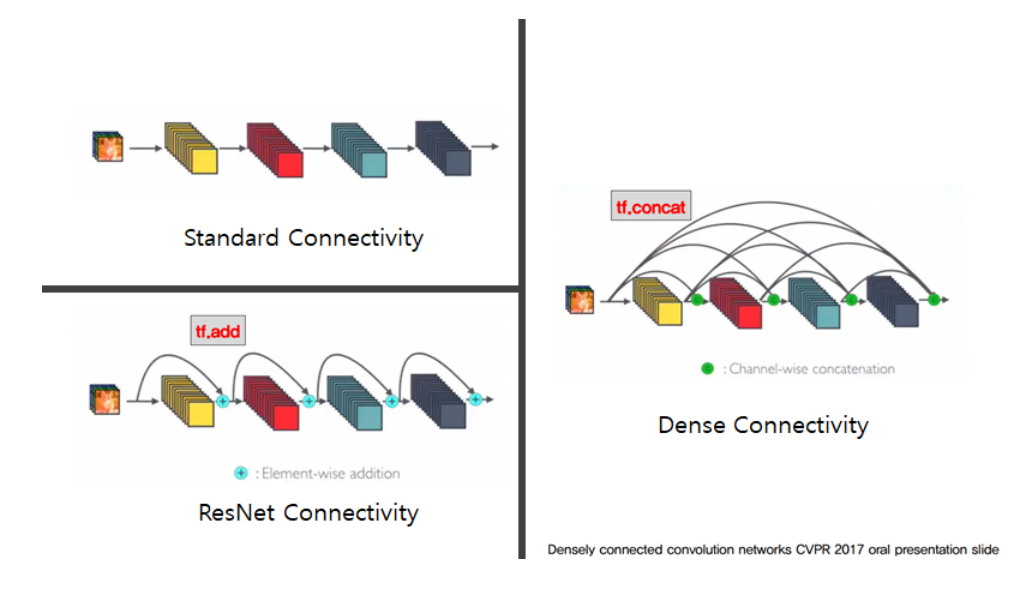

In [ ]:
x = np.array(X)
y = np.array(Y)

# initial pre trained model
pre_trained_models = {}
pre_trained_models["DenseNet169"] = DenseNet169(include_top=False, input_shape=(224, 224, 3), pooling="avg")

51888128/51877672 [==============================] - 1s 0us/step


In [ ]:
features = pre_trained_models["DenseNet169"].predict(x)

##train, test데이터 나누기

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=80)

X_train = pre_trained_models["DenseNet169"].predict(X_train)
X_test = pre_trained_models["DenseNet169"].predict(X_test)



##분류

XGBoost는 과적합 방지가 가능한 규제가 포함되어 있고
CART를 기반으로 한다 (즉, 분류와 회귀 둘 다 가능)


결국 Gradient Boost을 기반으로 함
(GBM이란 예측모형의 앙상블 방법론 중 부스팅계열에 속하는 알고리즘)

(부스팅이란 약한 분류기를 결합해 강한 분류기를 만드는 과정)



In [ ]:
XGB_Classifier = XGBClassifier(learning_rate=0.44, n_estimators=100, random_state=0, seed=0, gamma=0)


#XGBClassifier(값이 높을수록 과적합 하기 쉽다,트리의 수, random값을 고정하는 역할,seed,loss function 정의에 따라 튜닝)

In [ ]:
#모델을 학습시킴
XGB_Classifier.fit(X_train, Y_train)


#test데이터 예측하기
Y_pred = XGB_Classifier.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2,
       1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 1])

##모델 검증

In [ ]:
result = {}


result["Accuracy score"] = accuracy_score(Y_test, Y_pred)
result["confusion matrix"] = confusion_matrix(Y_test, Y_pred)
result["f1 score"] = f1_score(Y_test, Y_pred, average="macro")
result["precision score"] = precision_score(Y_test, Y_pred, average="macro")
result["Sensitivity"] = result["confusion matrix"][0,0] / (result["confusion matrix"][0,0] + result["confusion matrix"][0,1])
result["Specifity"] = result["confusion matrix"][1,1] / (result["confusion matrix"][1,0] + result["confusion matrix"][1,1])

print(f"\nAccuracy score : ", result["Accuracy score"])
print(f"\nconfusion matrix : \n", result["confusion matrix"])
print(f"\nf1 score : ", result["f1 score"])
print(f"\nprecision score : ", result["precision score"])
print(f"\nSpecifity : ", result["Specifity"])
print(f"\nSensitivity : ", result["Sensitivity"])


Accuracy score :  0.8666666666666667

confusion matrix : 
 [[19  1  2]
 [ 1 88 14]
 [ 0 12 88]]

f1 score :  0.876750700280112

precision score :  0.8891469916222392

Specifity :  0.9887640449438202

Sensitivity :  0.95


1.   Accuracy score : 정확도 수치
2.   confusion matrix : prediction 성능을 측정하기 위해 예측값과 실제값을 시각화한 표

3.   f1 score : 불균형 분류문제에서 주로 사용 precision과 recall의 조화평균
4.   precision score : 정밀도 수치로 긍정으로 예측한 것 중 실제로 맞춘 비율

5.   Specifity : 특이도 수치로 부정을 얼마나 잘 예측했는지 나타내는 지표
6.   Sensitivity : True Positive Rate로 실제 Positive를 얼마나 잘 예측했는지 (민감도로써 AUC를 구할때 중요한 척도로 사용됨)

##검사 평가

ROC curve는 의학, 보건학, 간호학 쪽에서 많이 쓰이는 분석기법

Confusion Matrix만으로는 모델의 평가 척도로써 부족할 수 있어서
모델의 효율성을 평가하는 척도로 ROC Curve라는 것이 존재

ROC curve와 x축을 이루고 있는 면적의 넓이를 AUC, AUC의 값이 1에 가까울수록 효율적인 모델

(225, 2)
(225, 2)


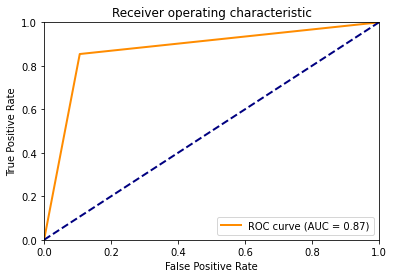

In [ ]:
from sklearn.metrics import roc_curve, auc

from sklearn import preprocessing
y_test = preprocessing.label_binarize(Y_test, classes=[0, 1])
y_pred = preprocessing.label_binarize(Y_pred, classes=[0, 1])
print(y_test.shape)
print(y_pred.shape)

n_classes = list(Y_test.shape)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("roc.svg", format="svg")
plt.show()

x축(False Positive Rate)과 y축(True Positive Rate), 휨 정도를 봐야함


예를 들어 병원에 코로나 검사를 받기 위해 내원했을때 의사(판단자)가 암에 걸렸다고 판단했을때 

1.   FPR : 실제 걸리지 않았는데 암에 걸렸다고 판단한 것 
2.   TPR : 실제 걸려있고 암에 걸렸다고 판단한 것 
3.   휨 정도 : 두 그룹을 잘 구별한다면 ROC 커버는 좌상단에 붙게됨 (가까워질수록 좋음)



In [ ]:
import sklearn
import pandas as pd

scoring = ['precision_macro', 'f1_macro', "accuracy"]

rs = 229
cv = KFold(n_splits=5, random_state=rs, shuffle=True)
scores = cross_validate(XGB_Classifier,features, y, cv=cv, scoring=scoring)
scr = pd.DataFrame(scores)
print(f"======== KFold random state {rs} ==========")
print(scr)
print("accuracy avg : ", scr["test_accuracy"].mean())



======== KFold random state 229 ==========
    fit_time  score_time  test_precision_macro  test_f1_macro  test_accuracy
0  18.184703    0.008893              0.879793       0.822236       0.826667
1  18.221328    0.009802              0.882701       0.871037       0.871111
2  17.754335    0.009262              0.854204       0.849678       0.826667
3  18.037497    0.008770              0.875222       0.866672       0.848889
4  17.408080    0.009241              0.828070       0.810838       0.795556
accuracy avg :  0.8337777777777777


##분류 모델 성능 평가 지표

In [ ]:
f = 0
for train_ix, test_ix in cv.split(features):
    # get data
    train_X, test_X = features[train_ix], features[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    model = XGB_Classifier
    model.fit(train_X, train_y)
    # evaluate model
    yhat = model.predict(test_X)
    acc = accuracy_score(test_y, yhat)
    # store score
    print(f"\n confusion matrix fold {f}")
    f = f+1
    print(confusion_matrix(test_y, yhat))


 confusion matrix fold 0
[[13  4  2]
 [ 0 94 12]
 [ 0 21 79]]

 confusion matrix fold 1
[[24  3  2]
 [ 1 94 14]
 [ 1  8 78]]

 confusion matrix fold 2
[[30  0  2]
 [ 2 67 22]
 [ 0 13 89]]

 confusion matrix fold 3
[[16  0  2]
 [ 1 81 17]
 [ 0 14 94]]

 confusion matrix fold 4
[[22  3  2]
 [ 1 69 25]
 [ 1 14 88]]
